In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mutations = ['F389L', 'S193A', 'S193V', 'S193L', 'V91F', 'W100L', 'C118M', 'W386F']
ligands = ['Pimozide', 'Benperidol', 'Spiperone', 'Mespiperone']
colors = ['g', 'c', 'orange', 'y']

affinities = [[0.201, 0.555, 0.122, 0.417, 0.459, 0.448, 2.965, 1.33, 11.021],
              [0.135, 1.151, 0.158, 0.092, 0.111, 0.298, 1.987, 2.039, 13.898],
              [0.044, 0.701, 0.047, 0.034, 0.065, 0.213, 0.385, 0.324, 4.045],
              [0.078, 2.328, 0.066, 0.049, 0.077, 0.324, 0.734, 0.71, 8.925],
              ]
sems = [[0.046, 0.178, 0.032, 0.112, 0.085, 0.105, 0.368, 0.281, 0.886],
        [0.021, 0.084, 0.021, 0.014, 0.007, 0.044, 0.223, 0.267, 4.195],
        [0.004, 0.114, 0.004, 0.008, 0.018, 0.06, 0.086, 0.018, 0.185],
        [0.015, 0.341, 0.012, 0.006, 0.006, 0.051, 0.033, 0.091, 1.931],
        ]

low, mean, high, error = [], [], [], []

for affinity, sem in zip(affinities, sems):
    low += [[]]
    mean += [[]]
    high += [[]]
    error += [[]]
    for a, e in zip(affinity[1:], sem[1:]):
        l = a - e
        h = a + e

        l_wt = affinity[0] - sem[0]
        h_wt = affinity[0] + sem[0]

        mean[-1] += [np.log10(a) - np.log10(affinity[0])]
        low[-1] += [mean[-1][-1] - (np.log10(l) - np.log10(h_wt))]
        high[-1] += [(np.log10(h) - np.log10(l_wt)) - mean[-1][-1]]

In [3]:
def get(ligand, mutation, metric):
    if metric == 'mean':
        data = mean
    elif metric == 'low':
        data = low
    elif metric == 'high':
        data = high
    elif metric == 'raw':
        if mutation == 'WT':
            idx =  0
        else:
            idx = mutations.index(mutation)+1
        return -np.log10(affinities[ligands.index(ligand)][idx])+9
    elif metric == 'raw-sem-low':
        if mutation == 'WT':
            idx =  0
        else:
            idx = mutations.index(mutation)+1
        _mean = affinities[ligands.index(ligand)][idx]
        _sem = sems[ligands.index(ligand)][idx]
        return - np.log10(_mean - _sem) + np.log10(_mean)
    elif metric == 'raw-sem-high':
        if mutation == 'WT':
            idx =  0
        else:
            idx = mutations.index(mutation)+1
        _mean = affinities[ligands.index(ligand)][idx]
        _sem = sems[ligands.index(ligand)][idx]
        return np.log10(_mean + _sem) - np.log10(_mean)
    else:
        assert False
    return data[ligands.index(ligand)][mutations.index(mutation)]

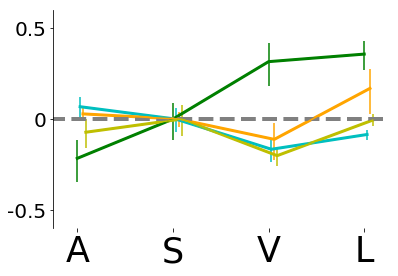

In [4]:
ax = plt.subplot(111)
for color, ligand in zip(colors, ligands):
    x = np.linspace(0, 3, 4) + ligands.index(ligand)*0.03
    y = [get(ligand, 'S193A', 'raw'), get(ligand, 'WT', 'raw'),
         get(ligand, 'S193V', 'raw'), get(ligand, 'S193L', 'raw')]
    
    
    err_low = [get(ligand, 'S193A', 'raw-sem-low'), get(ligand, 'WT', 'raw-sem-low'),
               get(ligand, 'S193V', 'raw-sem-low'), get(ligand, 'S193L', 'raw-sem-low')]
    err_high = [get(ligand, 'S193A', 'raw-sem-high'), get(ligand, 'WT', 'raw-sem-high'),
                get(ligand, 'S193V', 'raw-sem-high'), get(ligand, 'S193L', 'raw-sem-high')]
    err = [err_low, err_high]
    
    y = - np.array(y) + y[1]
    
    
    plt.plot(x, y, c = color, lw = 3)
    ax.errorbar(x, y, yerr=err, fmt='-', c = color)
    
ax.plot([-0.5, 3.5], [0, 0], '--', c = 'grey', lw=4)
ax.set_xticks(range(4))
ax.set_xticklabels(['A', 'S', 'V', 'L'], fontsize = 35)
ax.set_ylim(-0.6, 0.6)
ax.set_xlim(-0.25, 3.25)
ax.set_yticks([-0.5, 0, 0.5])
ax.set_yticklabels([-0.5, 0, 0.5], fontsize = 20)

#ax.set_title('S193', fontsize=40)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('../../pymol/figures/d2_panels/S193.pdf')
plt.show()

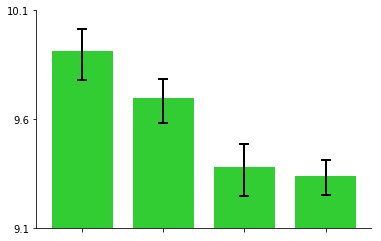

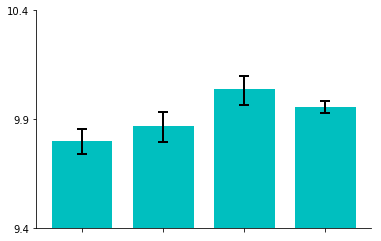

In [5]:
ax = plt.subplot(111)

color, ligand = 'limegreen', 'Pimozide'
width = 0.5
x = np.linspace(0, 2, 4)
y = [get(ligand, 'S193A', 'raw'), get(ligand, 'WT', 'raw'),get(ligand, 'S193V', 'raw'), get(ligand, 'S193L', 'raw')]
err_low = [get(ligand, 'S193A', 'raw-sem-low'), get(ligand, 'WT', 'raw-sem-low'),
           get(ligand, 'S193V', 'raw-sem-low'), get(ligand, 'S193L', 'raw-sem-low')]
err_high = [get(ligand, 'S193A', 'raw-sem-high'), get(ligand, 'WT', 'raw-sem-high'),
            get(ligand, 'S193V', 'raw-sem-high'), get(ligand, 'S193L', 'raw-sem-high')]

ax.bar(x, y, width, yerr=[err_low, err_high], color=color, 
       error_kw={'elinewidth': 2, 'capsize': 5, 'capthick':2})

ax.set_xticks(np.linspace(0, 2, 4))
ax.set_xticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(9.1, 10.1)
plt.yticks([9.1, 9.6, 10.1])
plt.savefig('../../pymol/figures/d2_panels/S193_pimozide.pdf')
plt.show()

ax = plt.subplot(111)
color, ligand = 'c', 'Benperidol'
x = np.linspace(0, 2, 4)
y = [get(ligand, 'S193A', 'raw'), get(ligand, 'WT', 'raw'),
     get(ligand, 'S193V', 'raw'), get(ligand, 'S193L', 'raw')]
err_low = [get(ligand, 'S193A', 'raw-sem-low'), get(ligand, 'WT', 'raw-sem-low'),
           get(ligand, 'S193V', 'raw-sem-low'), get(ligand, 'S193L', 'raw-sem-low')]
err_high = [get(ligand, 'S193A', 'raw-sem-high'), get(ligand, 'WT', 'raw-sem-high'),
            get(ligand, 'S193V', 'raw-sem-high'), get(ligand, 'S193L', 'raw-sem-high')]

ax.bar(x, y, width, yerr=[err_low, err_high], color=color, 
       error_kw={'elinewidth': 2, 'capsize': 5, 'capthick':2})

ax.set_xticks(np.linspace(0, 2, 4))
ax.set_xticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(9.4, 10.4)
plt.yticks([9.4, 9.9, 10.4])
plt.savefig('../../pymol/figures/d2_panels/S193_benperidol.pdf')
plt.show()

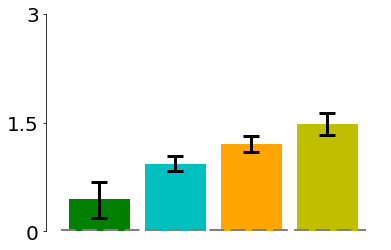

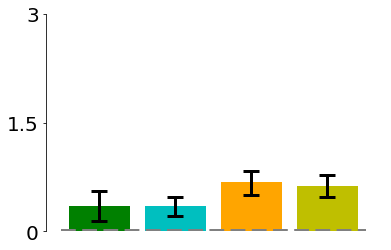

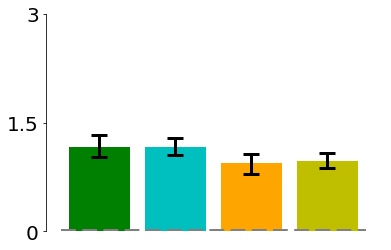

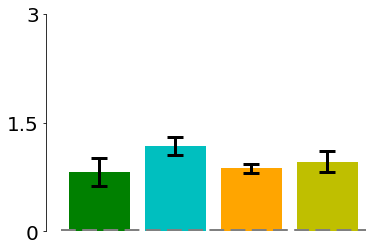

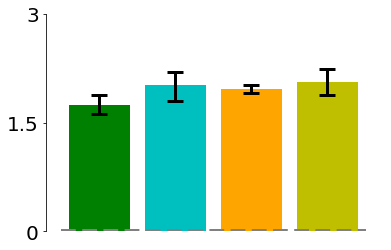

In [6]:
for mutation in mutations:
    if '193' in mutation: continue
    ax = plt.subplot(111)
    y = [get(ligand, mutation, 'mean') for ligand in ligands]
    yerr = [[get(ligand, mutation, 'low') for ligand in ligands],
            [get(ligand, mutation, 'high') for ligand in ligands]]
    ax.bar(range(len(ligands)), y, yerr = yerr, color = colors,
           error_kw={'elinewidth': 3, 'capsize': 8, 'capthick':3})
    ax.plot([-0.5, 3.5], [0, 0], '--', c = 'grey', lw=4)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.set_ylim(0, 3)
    ax.set_yticks([0, 1.5, 3])
    ax.set_yticklabels([0, 1.5, 3], fontsize=20)
    #ax.set_title(mutation, fontsize=40)
    
    ax.set_xticks([])
    
    plt.savefig('../../pymol/figures/d2_panels/{}.pdf'.format(mutation))
    plt.show()

In [7]:
def _parametric_bootstrap(mu_num1, mu_num2, sem_num1, sem_num2,
                          mu_den1, mu_den2, sem_den1, sem_den2,
                          samples=100000):
    num1 = np.random.normal(mu_num1, sem_num1, samples)
    num2 = np.random.normal(mu_num2, sem_num2, samples)
    den1 = np.random.normal(mu_den1, sem_den1, samples)
    den2 = np.random.normal(mu_den2, sem_den2, samples)
    
    print(sum(num1 < 0), sum(num2 < 0), sum(den1 < 0), sum(den2 < 0))
    
    den1[den1 < 0] = 1e-50
    den2[den2 < 0] = 1e-50
    
    ratio1 = num1 / den1
    ratio2 = num2 / den2
    
    print((ratio1 > ratio2).mean())
    plt.hist(np.log(ratio1) - np.log(ratio2), bins=50)
    plt.show()
    return (ratio1 > ratio2).mean()
    
def parametric_bootstrap(ligand1, ligand2, mutation):
    x = _parametric_bootstrap(affinities[ligands.index(ligand1)][mutations.index(mutation)+1],
                              affinities[ligands.index(ligand2)][mutations.index(mutation)+1],
                              sems[ligands.index(ligand1)][mutations.index(mutation)+1],
                              sems[ligands.index(ligand2)][mutations.index(mutation)+1],
                              affinities[ligands.index(ligand1)][0],
                              affinities[ligands.index(ligand2)][0],
                              sems[ligands.index(ligand1)][0],
                              sems[ligands.index(ligand2)][0])
    return x

Benperidol
0 35 1 0
0.10862


/Users/jpaggi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log
/Users/jpaggi/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jpaggi/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


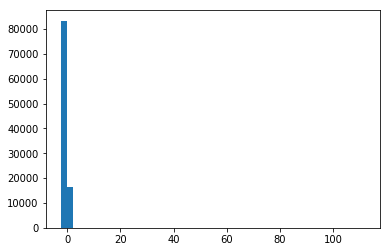

Spiperone
0 0 0 0
0.0483


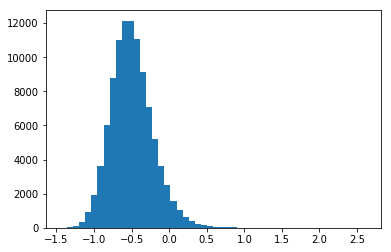

Mespiperone
0 0 1 0
0.04542


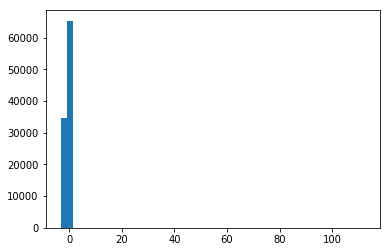

In [8]:
mutation = 'W386F'
ligand1 = 'Pimozide'
for ligand2 in ['Benperidol', 'Spiperone', 'Mespiperone']:
    print(ligand2)
    parametric_bootstrap(ligand1, ligand2, mutation)

Benperidol Spiperone V91F
0 19 0 0
0.04135


/Users/jpaggi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


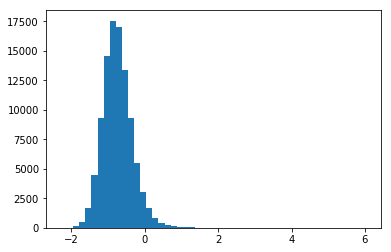

Benperidol Mespiperone V91F
0 0 0 0
0.02884


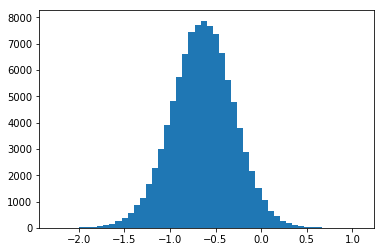

Benperidol Pimozide V91F
0 2 0 3
0.49113


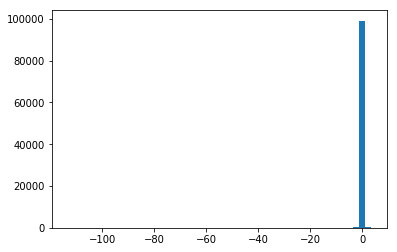

Spiperone Mespiperone V91F
23 0 0 0
0.62724


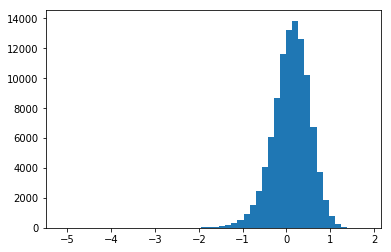

Spiperone Pimozide V91F
18 2 0 0
0.93126


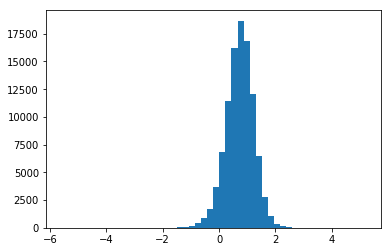

Mespiperone Pimozide V91F
0 1 0 0
0.92919


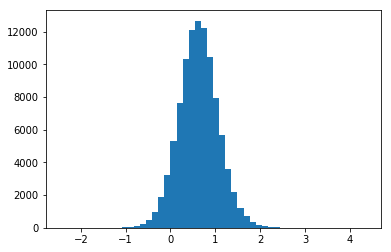

[[0.04135 0.02884 0.49113 0.     ]
 [0.62724 0.93126 0.      0.     ]
 [0.92919 0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
Benperidol Spiperone W100L
0 0 0 0
0.96586


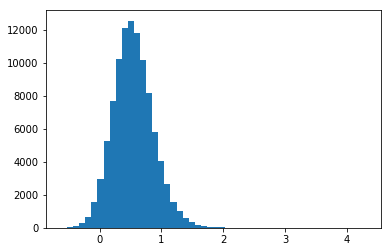

Benperidol Mespiperone W100L
0 0 0 0
0.93292


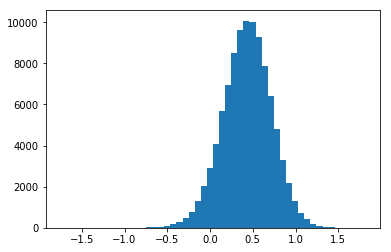

Benperidol Pimozide W100L
0 0 0 0
0.495


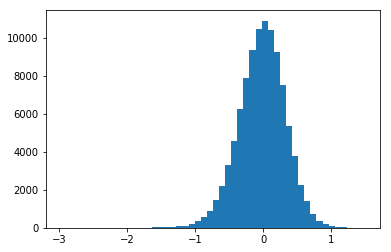

Spiperone Mespiperone W100L
1 0 0 0
0.38389


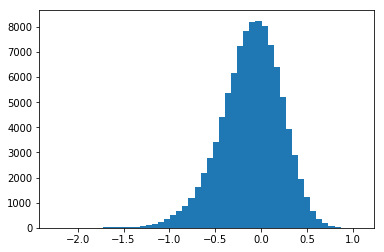

Spiperone Pimozide W100L
0 0 0 0
0.05463


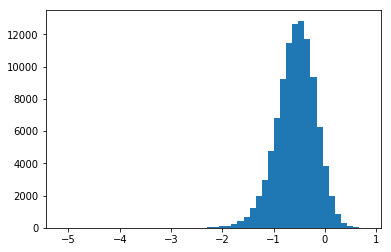

Mespiperone Pimozide W100L
0 0 0 1
0.08987


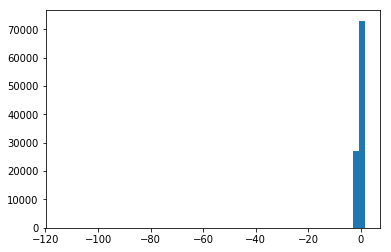

[[0.96586 0.93292 0.495   0.     ]
 [0.38389 0.05463 0.      0.     ]
 [0.08987 0.      0.      0.     ]
 [0.      0.      0.      0.     ]]
Benperidol Spiperone W386F
35 0 0 0
0.61651


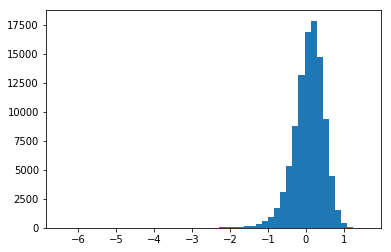

Benperidol Mespiperone W386F
49 1 0 0
0.3969


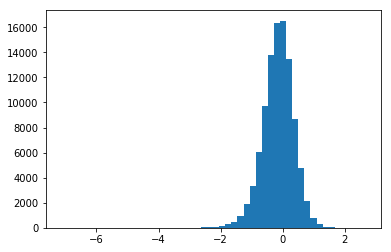

Benperidol Pimozide W386F
49 0 0 0
0.88948


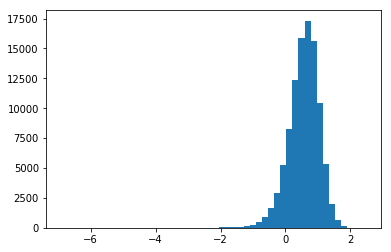

Spiperone Mespiperone W386F
0 0 0 0
0.24536


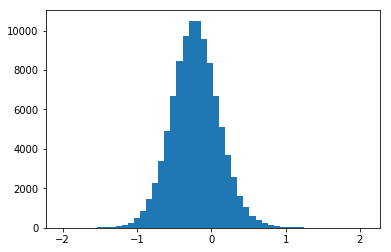

Spiperone Pimozide W386F
0 0 0 0
0.95229


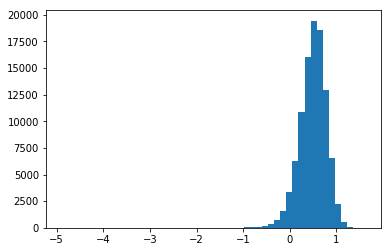

Mespiperone Pimozide W386F
0 0 0 0
0.95383


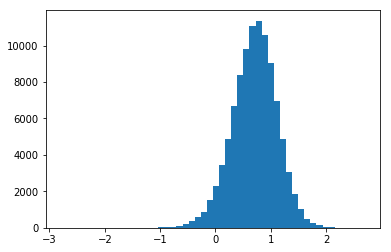

[[0.61651 0.3969  0.88948 0.     ]
 [0.24536 0.95229 0.      0.     ]
 [0.95383 0.      0.      0.     ]
 [0.      0.      0.      0.     ]]


In [9]:
for mutation in ['V91F', 'W100L', 'W386F']:
    X = np.zeros((4, 4))
    for i, ligand1 in enumerate(['Benperidol', 'Spiperone', 'Mespiperone', 'Pimozide']):
        for j, ligand2 in enumerate(['Benperidol', 'Spiperone', 'Mespiperone', 'Pimozide'][i+1:]):
            print(ligand1, ligand2, mutation)
            X[i, j] = parametric_bootstrap(ligand1, ligand2, mutation)
    print(X)